In [1]:
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('/content/Hospital_data.csv', sep=';')

In [3]:
print("Number of patients in original dataset: " +str(len(df.index)))
df.sample(10)

Number of patients in original dataset: 500


,Reason,Gender,Age,Mobility,Distance,Participation
303,NaN,F,"71,20",No car,"71,90",0
215,NaN,M,"53,00",Car,"34,30",1
67,Other obligations,F,"55,00",No car,"25,20",0
135,Disliked therapist,M,"83,70",No car,"61,20",0
450,NaN,M,"66,00",Car,"46,80",1
312,NaN,F,"73,60",No car,"45,80",0
161,NaN,M,"64,70",No car,"52,40",0
258,NaN,M,"77,50",Car,"78,10",0
416,NaN,M,"81,00",No car,"61,20",0
481,NaN,F,"83,00",No car,"63,70",1


In [4]:
df.info()
# In order to perform a logistic regression the data needs to be in a suitable form
# As we can see some of the features need to be modified to fit the model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reason         156 non-null    object
 1   Gender         500 non-null    object
 2   Age            500 non-null    object
 3   Mobility       500 non-null    object
 4   Distance       500 non-null    object
 5   Participation  500 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [5]:
Gender =pd.get_dummies(df['Gender'], drop_first=True)
#Creating dummy variables for Gender and Mobility

In [6]:
Mobility = pd.get_dummies(df['Mobility'], drop_first=True)
df=pd.concat([df,Mobility,Gender],axis=1)

In [7]:
df.drop(['Reason','Gender','Mobility'], axis=1, inplace=True)
#Removing unnecessary features

In [8]:
df.head(5)

,Age,Distance,Participation,No car,M
0,"61,30","68,70",0,1,1
1,"85,80","86,30",0,0,1
2,"65,00","46,20",1,1,0
3,"72,50","39,70",0,1,0
4,"93,00","73,30",0,1,1


In [9]:
df = df.replace('[,]', '.', regex=True)

In [10]:
df['Age'] = df['Age'].astype(float)
df['Distance'] = df['Distance'].astype(float)

<Axes: xlabel='Participation', ylabel='count'>

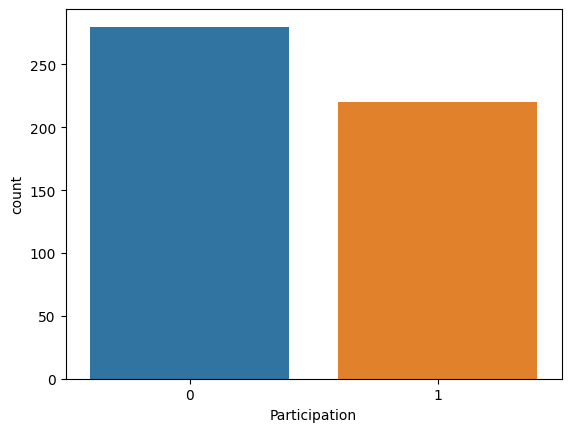

In [11]:
sns.countplot (x="Participation", data=df)
# Number of patitens that participated

<Axes: ylabel='Frequency'>

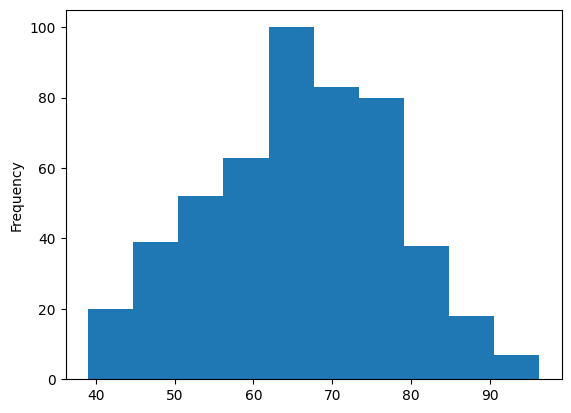

In [12]:
df["Age"].plot.hist()
#Age distribution of the patients

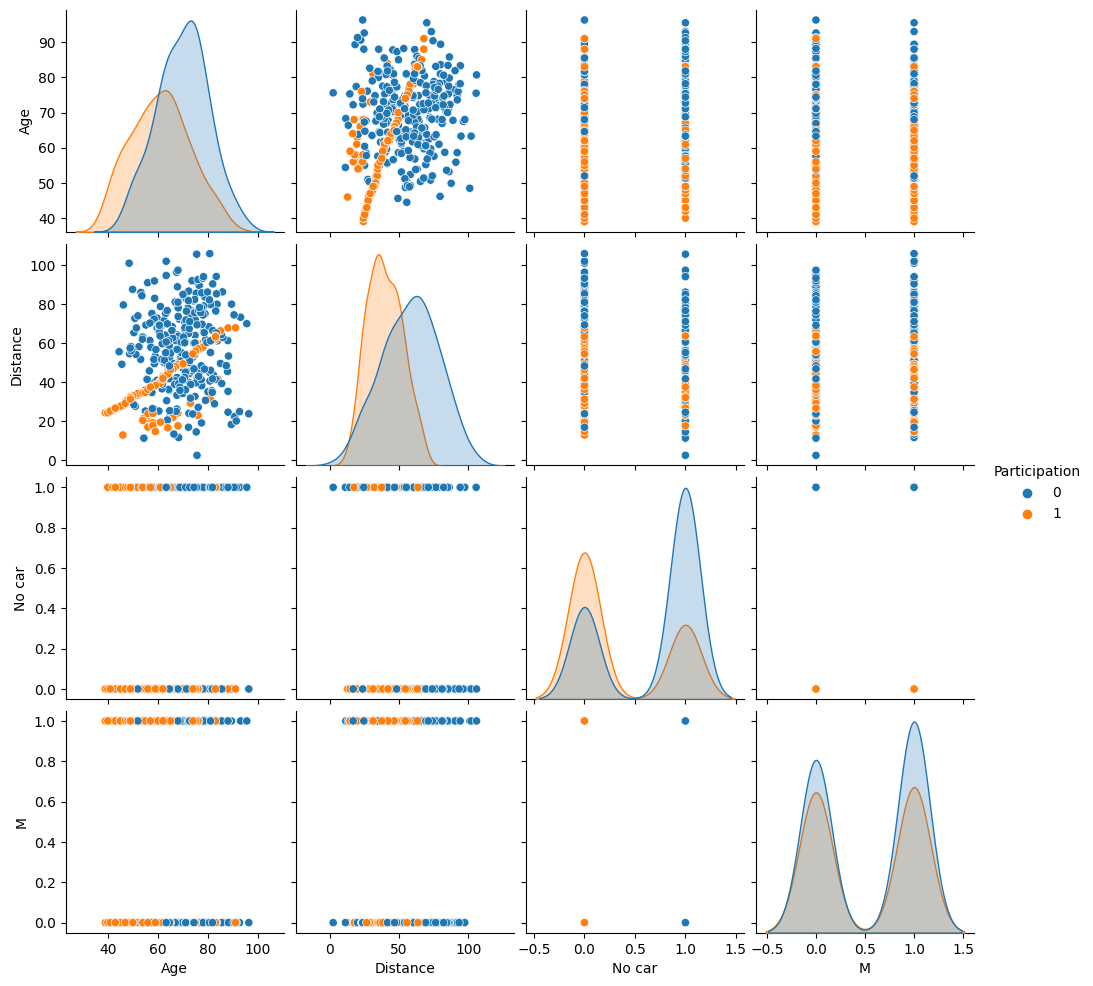

In [13]:
sns.pairplot(df, hue="Participation",)

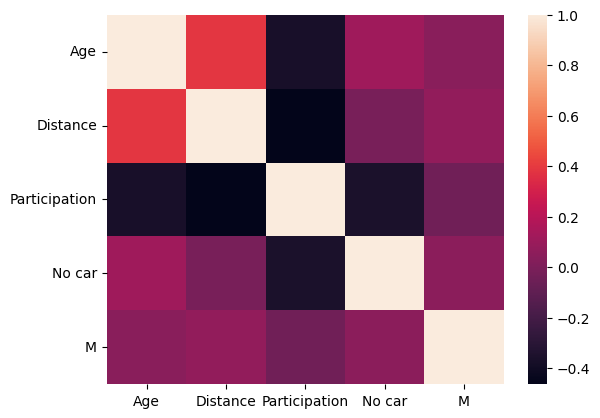

In [14]:
sns.heatmap(df.corr())
plt.show()
#Correlation heatmap between features

In [15]:
X= df.drop("Participation", axis=1)
y= df["Participation"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

In [17]:
logmodel=LogisticRegression(solver='liblinear')

In [18]:
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [19]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        83
           1       0.70      0.69      0.69        67

    accuracy                           0.73       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.73      0.73      0.73       150



In [20]:
confusion_matrix(y_test, predictions)

array([[63, 20],
       [21, 46]])

In [21]:
accuracy_score(y_test, predictions)
# The model achieves an accuracy of around 70%

0.7266666666666667

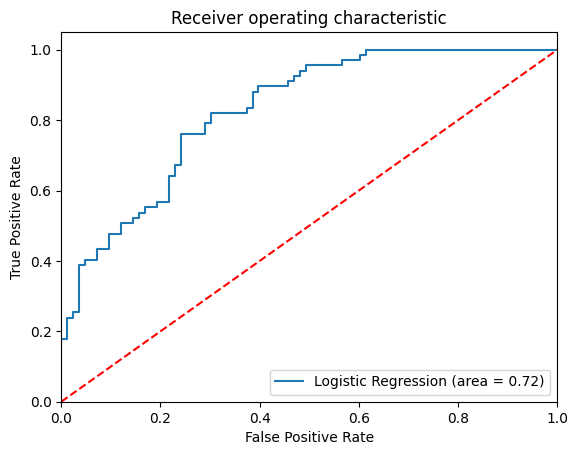

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#Finally the ROC curve for the regression

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.560634
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.183     
Dependent Variable: Participation    AIC:              568.6337  
Date:               2023-07-10 05:53 BIC:              585.4922  
No. Observations:   500              Log-Likelihood:   -280.32   
Df Model:           3                LL-Null:          -342.96   
Df Residuals:       496              LLR p-value:      5.5800e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.0409    0.0057   7.1424  0.0000   0.0297   0.0521
Distance      -0.0504    0.0068  -7.4483  0.0000  -0.0637  -0.